# Advanced Machine Learning
## Course Project

Ana Araújo, 59457

Pedro Almeida, 58844

## Content Table:
### 1. Data
- Data Upload
- Data Preprocessing
- General baseline

### 2. Autoencoder
- 50% Data Reduction
- 75% Data Reduction
- 87.5% Data Reduction

### 3. Conclusions


---

In [ ]:
# Import
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape, Dense
from keras.models import Model
import tensorflow as tf
from PIL import Image
import os
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.preprocessing import LabelEncoder


import random
import time

In [ ]:
from skimage.transform import resize

def resize_images(image_array, new_shape):
    resized_images = []
    for image in image_array:
        resized_image = resize(image, new_shape)
        resized_images.append(resized_image)
    resized_images = np.array(resized_images)
    return resized_images

In [ ]:
def classifiers(X_train, X_test, y_train, y_test):

    #Define classifiers and hyperparameters for grid search
    classifiers = {
        'Decision Tree': (DecisionTreeClassifier(), {'max_depth': [7]}),
        'Random Forest': (RandomForestClassifier(), {'n_estimators': [100], 'max_depth': [None]}),
        'SVM': (SVC(), {'C': [1], 'gamma': [0.001]}),
        'k-NN': (KNeighborsClassifier(), {'n_neighbors': [7]}),
    }

    results = []
    for name, (clf, param_grid) in classifiers.items():
        start_time = time.time()
        grid_search = GridSearchCV(clf, param_grid)
        grid_search.fit(X_train, y_train)
        predictions = grid_search.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        label_encoder = LabelEncoder()
        y_test_encoded = label_encoder.fit_transform(y_test)
        predictions_encoded = label_encoder.fit_transform(predictions)
        recall = recall_score(y_test_encoded, predictions_encoded)
        precision = precision_score(y_test_encoded, predictions_encoded)
        f1 = f1_score(y_test_encoded, predictions_encoded)
        results.append({'Classifier': name, 'Accuracy': accuracy, 'Recall':recall, 'Precision':precision, 'F1 score':f1})
        elapsed_time = time.time() - start_time
        print("Elapsed time: {:.2f} seconds".format(elapsed_time))

    results_df = pd.DataFrame(results)
    return results_df

In [ ]:
def load_images_from_folder(folder, category, width, height):
    dataset = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path):
            img = Image.open(img_path)
            img = img.resize((width, height))  # Resize the image
            img_array = np.array(img)
            dataset.append([img_array, category])
    return dataset


In [ ]:
def img_show():
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(1, n+1):
        # Display original:
        ax = plt.subplot(2, n, i)
        plt.imshow(X_test[i])
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction:
        ax = plt.subplot(2, n, i+n)
        plt.imshow(decoded_imgs[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

---
# 1. Data
## 1.1 Images upload

In [ ]:
folder_path_1 = r"C:\Users\pedro\Downloads\Aprendizagem Automatica Avançada\Course Project\Dataset\Cat"
folder_path_2 = r"C:\Users\pedro\Downloads\Aprendizagem Automatica Avançada\Course Project\Dataset\Dog"

dataset_cats_test = load_images_from_folder(folder_path_1, "cat", 64, 64)
dataset_dogs_test = load_images_from_folder(folder_path_2, "dog", 64, 64)

C:\Users\pedro\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:793: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [ ]:
dataset = np.concatenate((dataset_cats_test[:len(dataset_cats_test)//6], dataset_dogs_test[:len(dataset_dogs_test)//6])) #, dataset_cats_train, dataset_dogs_train))
dataset = np.random.permutation(dataset)
X = dataset[:,-2]
y = dataset[:,-1]

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


## 1.2 Data Preprocessing and Exploration

We had to do this because some images had different RGB values and more ahead it was causing problems.

In [ ]:
X_ = []
y_ = []
for i,j in zip(X,y):
    if i.shape != (64, 64, 3):
        pass
    else:
        X_.append(i)
        y_.append(j)

X = np.array(X_)
y = np.array(y_)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=42)
X_train, X_IVS, y_train, y_IVS = train_test_split(X_train, y_train, test_size=0.2, train_size=0.8, random_state=42)

In [ ]:
X_train = X_train / 255.
X_test = X_test / 255.
X_IVS = X_IVS / 255.

Training shape: (2324, 64, 64, 3)
2324 sample, 64 x 64 size RGB image.

Test shape: (1246, 64, 64, 3)
1246 sample, 64 x 64 size RGB image.

IVS shape: (581, 64, 64, 3)
581 sample, 64 x 64 size RGB image.

Examples:


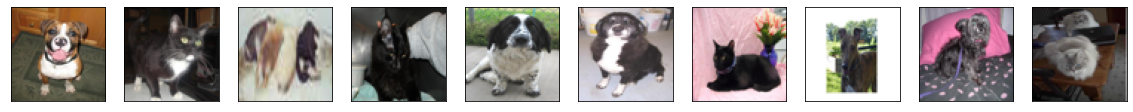

In [ ]:
# About Dataset:
img_size = X_train.shape[1] # 64
print('Training shape:', X_train.shape)
print(X_train.shape[0], 'sample,',X_train.shape[1] ,'x',X_train.shape[2] ,'size RGB image.\n')
print('Test shape:', X_test.shape)
print(X_test.shape[0], 'sample,',X_test.shape[1] ,'x',X_test.shape[2] ,'size RGB image.\n')
print('IVS shape:', X_IVS.shape)
print(X_IVS.shape[0], 'sample,',X_IVS.shape[1] ,'x',X_IVS.shape[2] ,'size RGB image.\n')

print('Examples:')
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n+1):
    # Display some data:
    ax = plt.subplot(1, n, i)
    plt.imshow(X_train[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

---
## 1.3 Define baseline
Here we run the raw, unprocessed images into some classifiers to have a baseline to serve as comparison to the experiments that will be done ahead.

Beside the classifiers we did a small grid search to find the hyperparameters that were more suitable.

In [ ]:
def evaluate_classifiers(X_train, X_test, y_train, y_test):

    #Define classifiers and hyperparameters for grid search
    classifiers = {
        'Decision Tree': (DecisionTreeClassifier(), {'max_depth': [3, 5, 7]}),
        'Random Forest': (RandomForestClassifier(), {'n_estimators': [100, 200, 300], 'max_depth': [5, 10, None]}),
        'SVM': (SVC(), {'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001]}),
        'k-NN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    }

    results = []
    for name, (clf, param_grid) in classifiers.items():
        start_time = time.time()
        grid_search = GridSearchCV(clf, param_grid)
        grid_search.fit(X_train, y_train)
        predictions = grid_search.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        results.append({'Classifier': name, 'Accuracy': accuracy, 'Best Parameters': grid_search.best_params_})
        elapsed_time = time.time() - start_time
        print("Elapsed time: {:.2f} seconds".format(elapsed_time))

    results_df = pd.DataFrame(results)
    return results_df

In [ ]:
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

df = evaluate_classifiers(X_train_reshaped, X_test_reshaped, y_train, y_test)

Elapsed time: 117.04 seconds
Elapsed time: 744.34 seconds
Elapsed time: 976.10 seconds
Elapsed time: 5.10 seconds


In [ ]:
df

,Classifier,Accuracy,Best Parameters
0,Decision Tree,0.581059,{'max_depth': 3}
1,Random Forest,0.636437,"{'max_depth': None, 'n_estimators': 300}"
2,SVM,0.616372,"{'C': 10, 'gamma': 0.001}"
3,k-NN,0.555377,{'n_neighbors': 7}


---
# 2. Autoencoders
## 2.1 50% Reduction
In this experiment we have reduced the original images to 32x32, this being a 50% reduction from the original 64x64 pixels

In [ ]:
input_img = Input(shape=(64, 64, 3))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='rmsprop', loss='mse')

encoder_model = Model(input_img, encoded)

autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 up_sampling2d (UpSampling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 3)         867   

In [ ]:
# Checkpoints:
from keras.callbacks import ModelCheckpoint, TensorBoard
checkpoints = []

In [ ]:
# Training Model:
epochs = 30
batch_size = 1
autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, X_test), shuffle=True, callbacks=checkpoints)

Epoch 1/30
2324/2324 [==============================] - 15s 6ms/step - loss: 0.0065 - val_loss: 0.0037
Epoch 2/30
2324/2324 [==============================] - 15s 6ms/step - loss: 0.0024 - val_loss: 0.0015
Epoch 3/30
2324/2324 [==============================] - 15s 6ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 4/30
2324/2324 [==============================] - 15s 7ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 5/30
2324/2324 [==============================] - 15s 7ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 6/30
2324/2324 [==============================] - 15s 6ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 7/30
2324/2324 [==============================] - 15s 6ms/step - loss: 0.0012 - val_loss: 9.9017e-04
Epoch 8/30
2324/2324 [==============================] - 15s 6ms/step - loss: 0.0011 - val_loss: 9.1755e-04
Epoch 9/30
2324/2324 [==============================] - 15s 7ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 10/30
2324/2324 [==============================] - 15s 6ms/

In [ ]:
decoded_imgs = autoencoder.predict(X_test)

39/39 [==============================] - 1s 15ms/step


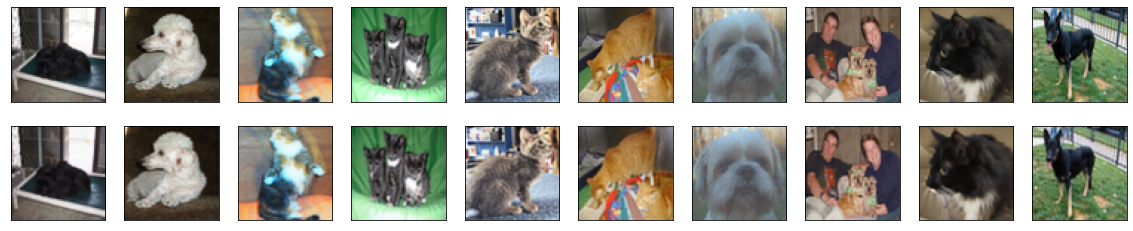

In [ ]:
img_show()

In [ ]:
X_train_50_encoded = encoder_model.predict(X_train)
X_train_resized = resize_images(X_train, (32, 32, 3))

X_train_50_encoded = X_train_50_encoded.reshape(X_train_50_encoded.shape[0], -1)
X_train_resized = X_train_resized.reshape(X_train_resized.shape[0], -1)


X_IVS_50_encoded = encoder_model.predict(X_IVS)
X_IVS_resized = resize_images(X_IVS, (32, 32, 3))

X_IVS_50_encoded = X_IVS_50_encoded.reshape(X_IVS_50_encoded.shape[0], -1)
X_IVS_resized = X_IVS_resized.reshape(X_IVS_resized.shape[0], -1)

19/19 [==============================] - 0s 7ms/step


In [ ]:
df_50_1 = classifiers(X_train_50_encoded, X_IVS_50_encoded, y_train, y_IVS)
df_50_2 = classifiers(X_train_resized, X_IVS_resized, y_train, y_IVS)

Elapsed time: 169.42 seconds
Elapsed time: 94.59 seconds
Elapsed time: 286.68 seconds
Elapsed time: 8.16 seconds
Elapsed time: 19.21 seconds
Elapsed time: 34.60 seconds
Elapsed time: 33.50 seconds
Elapsed time: 0.74 seconds


In [ ]:
df_50_1

,Classifier,Accuracy,Recall,Precision,F1 score
0,Decision Tree,0.583477,0.489437,0.588983,0.534615
1,Random Forest,0.690189,0.721831,0.669935,0.694915
2,SVM,0.698795,0.707746,0.686007,0.696707
3,k-NN,0.581756,0.619718,0.565916,0.591597


In [ ]:
df_50_2

,Classifier,Accuracy,Recall,Precision,F1 score
0,Decision Tree,0.547332,0.654930,0.529915,0.585827
1,Random Forest,0.586919,0.588028,0.575862,0.581882
2,SVM,0.600688,0.750000,0.569519,0.647416
3,k-NN,0.590361,0.718310,0.563536,0.631579


---
## 2.3 75% reduction

In this experiment we have reduced the original images to 16x16, this being a 75% reduction from the original 64x64 pixels

In [ ]:
input_img = Input(shape=(64, 64, 3))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)


x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='rmsprop', loss='mse')

encoder_model = Model(input_img, encoded)

autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        3692

In [ ]:
# Checkpoints:
from keras.callbacks import ModelCheckpoint, TensorBoard
checkpoints = []
#checkpoints.append(TensorBoard(log_dir='/Checkpoints/logs'))

In [ ]:
# Training Model:
epochs = 30
batch_size = 1
autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, X_test), shuffle=True, callbacks=checkpoints)

Epoch 1/30
2324/2324 [==============================] - 22s 9ms/step - loss: 0.0102 - val_loss: 0.0054
Epoch 2/30
2324/2324 [==============================] - 22s 10ms/step - loss: 0.0051 - val_loss: 0.0038
Epoch 3/30
2324/2324 [==============================] - 22s 9ms/step - loss: 0.0042 - val_loss: 0.0037
Epoch 4/30
2324/2324 [==============================] - 21s 9ms/step - loss: 0.0037 - val_loss: 0.0030
Epoch 5/30
2324/2324 [==============================] - 22s 10ms/step - loss: 0.0034 - val_loss: 0.0028
Epoch 6/30
2324/2324 [==============================] - 22s 10ms/step - loss: 0.0032 - val_loss: 0.0029
Epoch 7/30
2324/2324 [==============================] - 22s 9ms/step - loss: 0.0030 - val_loss: 0.0026
Epoch 8/30
2324/2324 [==============================] - 23s 10ms/step - loss: 0.0029 - val_loss: 0.0035
Epoch 9/30
2324/2324 [==============================] - 21s 9ms/step - loss: 0.0028 - val_loss: 0.0023
Epoch 10/30
2324/2324 [==============================] - 22s 9ms/step

In [ ]:
decoded_imgs = autoencoder.predict(X_test)

39/39 [==============================] - 1s 27ms/step


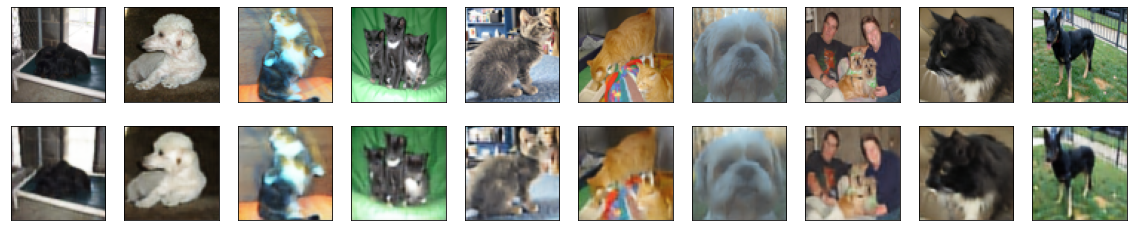

In [ ]:
img_show()

In [ ]:
X_train_75_encoded = encoder_model.predict(X_train)
X_train_resized = resize_images(X_train, (16, 16, 3))

X_train_75_encoded = X_train_75_encoded.reshape(X_train_75_encoded.shape[0], -1)
X_train_resized = X_train_resized.reshape(X_train_resized.shape[0], -1)


X_IVS_75_encoded = encoder_model.predict(X_IVS)
X_IVS_resized = resize_images(X_IVS, (16, 16, 3))

X_IVS_75_encoded = X_IVS_75_encoded.reshape(X_IVS_75_encoded.shape[0], -1)
X_IVS_resized = X_IVS_resized.reshape(X_IVS_resized.shape[0], -1)

19/19 [==============================] - 0s 10ms/step


In [ ]:
df_75_1 = classifiers(X_train_75_encoded, X_IVS_75_encoded, y_train, y_IVS)
df_75_2 = classifiers(X_train_resized, X_IVS_resized, y_train, y_IVS)

Elapsed time: 83.20 seconds
Elapsed time: 64.09 seconds
Elapsed time: 144.98 seconds
Elapsed time: 4.17 seconds
Elapsed time: 4.39 seconds
Elapsed time: 16.32 seconds
Elapsed time: 6.03 seconds
Elapsed time: 0.33 seconds


In [ ]:
df_75_1

,Classifier,Accuracy,Recall,Precision,F1 score
0,Decision Tree,0.605852,0.598592,0.596491,0.597540
1,Random Forest,0.697074,0.693662,0.688811,0.691228
2,SVM,0.714286,0.707746,0.707746,0.707746
3,k-NN,0.581756,0.602113,0.568106,0.584615


In [ ]:
df_75_2

,Classifier,Accuracy,Recall,Precision,F1 score
0,Decision Tree,0.561102,0.609155,0.545741,0.575707
1,Random Forest,0.624785,0.640845,0.610738,0.625430
2,SVM,0.569707,0.813380,0.539720,0.648876
3,k-NN,0.585198,0.735915,0.557333,0.634294


---
## 2.3 87.5% reduction

In this experiment we have reduced the original images to 8x8, this being a 87.5% reduction from the original 64x64 pixels

In [ ]:
# Deep Learning Model:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dense
from keras.models import Model

input_img = Input(shape=(64, 64, 3))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='rmsprop', loss='mse')

encoder_model = Model(input_img, encoded)

autoencoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)        3692

In [ ]:
# Checkpoints:
from keras.callbacks import ModelCheckpoint, TensorBoard
checkpoints = []


In [ ]:
# Training Model:
epochs = 30
batch_size = 1
autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, X_test), shuffle=True, callbacks=checkpoints)

Epoch 1/30
2324/2324 [==============================] - 24s 10ms/step - loss: 0.0183 - val_loss: 0.0184
Epoch 2/30
2324/2324 [==============================] - 23s 10ms/step - loss: 0.0107 - val_loss: 0.0086
Epoch 3/30
2324/2324 [==============================] - 25s 11ms/step - loss: 0.0092 - val_loss: 0.0084
Epoch 4/30
2324/2324 [==============================] - 25s 11ms/step - loss: 0.0083 - val_loss: 0.0080
Epoch 5/30
2324/2324 [==============================] - 24s 10ms/step - loss: 0.0078 - val_loss: 0.0067
Epoch 6/30
2324/2324 [==============================] - 24s 10ms/step - loss: 0.0073 - val_loss: 0.0072
Epoch 7/30
2324/2324 [==============================] - 23s 10ms/step - loss: 0.0069 - val_loss: 0.0064
Epoch 8/30
2324/2324 [==============================] - 24s 10ms/step - loss: 0.0066 - val_loss: 0.0063
Epoch 9/30
2324/2324 [==============================] - 24s 10ms/step - loss: 0.0063 - val_loss: 0.0058
Epoch 10/30
2324/2324 [==============================] - 23s 10m

39/39 [==============================] - 1s 30ms/step


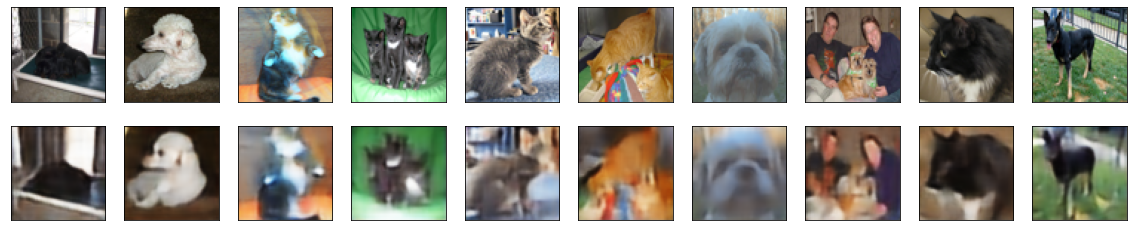

In [ ]:
decoded_imgs = autoencoder.predict(X_test)
img_show()

In [ ]:
X_train_875_encoded = encoder_model.predict(X_train)
X_train_resized = resize_images(X_train, (16, 16, 3))

X_train_875_encoded = X_train_875_encoded.reshape(X_train_875_encoded.shape[0], -1)
X_train_resized = X_train_resized.reshape(X_train_resized.shape[0], -1)


X_IVS_875_encoded = encoder_model.predict(X_IVS)
X_IVS_resized = resize_images(X_IVS, (16, 16, 3))

X_IVS_875_encoded = X_IVS_875_encoded.reshape(X_IVS_875_encoded.shape[0], -1)
X_IVS_resized = X_IVS_resized.reshape(X_IVS_resized.shape[0], -1)

19/19 [==============================] - 0s 15ms/step


In [ ]:
df_875_1 = classifiers(X_train_75_encoded, X_IVS_75_encoded, y_train, y_IVS)
df_875_2 = classifiers(X_train_resized, X_IVS_resized, y_train, y_IVS)

Elapsed time: 83.49 seconds
Elapsed time: 63.70 seconds
Elapsed time: 151.85 seconds
Elapsed time: 4.65 seconds
Elapsed time: 4.38 seconds
Elapsed time: 16.30 seconds
Elapsed time: 6.31 seconds
Elapsed time: 1.54 seconds


In [ ]:
df_875_1

,Classifier,Accuracy,Recall,Precision,F1 score
0,Decision Tree,0.617900,0.598592,0.611511,0.604982
1,Random Forest,0.683305,0.679577,0.674825,0.677193
2,SVM,0.714286,0.707746,0.707746,0.707746
3,k-NN,0.581756,0.602113,0.568106,0.584615


In [ ]:
df_875_2

,Classifier,Accuracy,Recall,Precision,F1 score
0,Decision Tree,0.567986,0.616197,0.552050,0.582363
1,Random Forest,0.602410,0.595070,0.592982,0.594025
2,SVM,0.569707,0.813380,0.539720,0.648876
3,k-NN,0.585198,0.735915,0.557333,0.634294


# Conclusions

Generally speaking, the classifiers metrics improved when the data was encoded by the autoencoder, when compared both to the original data and the resized data. But this increase is made at the cost of computational cycles, thus,overall the classifiers with encoded data take much more time to run than the others. This trade-off should be taken into account when pending which option to choose, either encode the data or just resize it. Both end up with the same size but the encoded keeps crutial features to "describe" that data.